# CS/MATH 375 Homework #1

In [1]:
clc; clear all; close all
format compact 

##### 1. Suppose `z=[10 40 50 80 30 70 60 90]`. What does this vector look like after each of these commands?

*(a)* `z(1:2:7) = zeros(1,4)`

In [12]:
z = [10 40 50 80 30 70 60 90 ];
z(1:2:7) = zeros(1,4)

z =
     0    40     0    80     0    70     0    90


*(b)* `z([3 4 8 1])=[]`

In [13]:
z([3 4 8 1])=[]

z =
    40     0    70     0


##### 2. Part a and b:

**(a) Use the linspace function to create vectors identical to the following created with colon notation:**

*i.* `t1 = 1:6:37`

In [10]:
t1 = 1:6:37;
    t = linspace(1,37,7)
    t == t1

t =
     1     7    13    19    25    31    37
ans =
  1x7 logical array
   1   1   1   1   1   1   1


*ii.* `x1 = -2:4;`

In [11]:
x1 = -2:4;
    x = linspace(-2,4,7)
    x == x1

x =
    -2    -1     0     1     2     3     4
ans =
  1x7 logical array
   1   1   1   1   1   1   1


**(b) Use colon notation to create vectors identical to the following created with the linspace function:**

*i.*

In [22]:
v1 = linspace(-3,0,5);
    v = -3:(3/4):0
    v == v1

v =
  Columns 1 through 3
                        -3                     -2.25                      -1.5
  Columns 4 through 5
                     -0.75                         0
ans =
  1x5 logical array
   1   1   1   1   1


*ii.*

In [12]:
r1 = linspace(2,4,7);
    r  = 2:(1/3):4
    r == r1

r =
  Columns 1 through 3
                         2          2.33333333333333          2.66666666666667
  Columns 4 through 6
                         3          3.33333333333333          3.66666666666667
  Column 7
                         4
ans =
  1x7 logical array
   1   1   1   1   0   0   1


#### 3. Given that `t = 0:( pi/30 ):pi; y = cos( t )`, write a single-line MATLAB code that returns the following.

In [19]:
t = 0:pi/30:pi; y = cos(t);
N = 31; %for example

(a) $\sum_{k=1}^{N} t_k $ (using sum)

In [20]:
sum(t(1:N))

ans =
          48.6946861306418


$\sum_{k=1}^N t_k y_k$ (dot op)

In [21]:
t(1:N)*y(1:N)'

ans =
         -20.6868523643468


$\sum_{k=1}^N t_k^2$ (dot op)

In [25]:
t(1:N)*t(1:N)'
%or
sum([t(1:N)].^2)

ans =
             103.685677347
ans =
             103.685677347


#### 4. Write two MATLAB scripts to plot $x, x^2, x^3, x^4$ over the interval $0 ≤ x ≤ 1$ using `plot()` and `loglog()`.

**Save to working directory as** `lameplot.m`
```matlab
clc
clear
close

resolution = 100;
x = linspace(0,1,resolution);
N = 30
relevant = 4;
hold on;
l = [];
gry= linspace(0,1,N);
for i = 1:N;
    if i<= relevant;
        plot(x,x.^i,'LineWidth',1.5);
        l = [l; sprintf('x^%g',i)];
    else
        plot(x,x.^i,'Color',[gry(i),gry(i),gry(i)],'LineWidth',.5);
    end
end
xlabel('Independent Variable','FontSize',14); ylabel('Dependent Variable','FontSize',14);
legend({l},'Location','best','FontSize',14);
title('Using Plot ( ) for x, x^2, x^3, x^4');
```

N =
    30


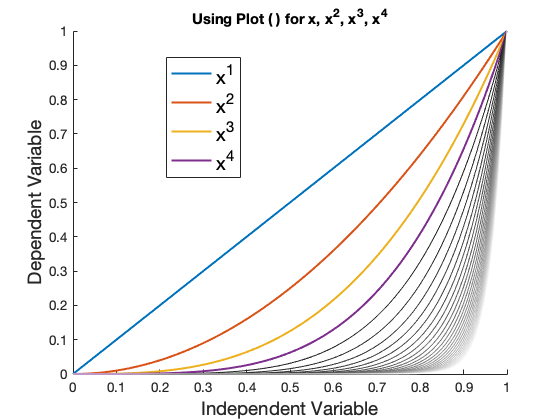

In [15]:
%plot inline
run lameplot.m

**Save to working directory as** `lameplot2.m`
```matlab
clc
clear
close

resolution = 100;
x = linspace(0,1,resolution);
N = 10;
relevant = 4;
l = [];
gry= linspace(0,1,N);
for i = 1:N;
    if i<= relevant
        loglog(x,x.^i,'LineWidth',1.5);
        hold on;
        l = [l; sprintf('x^%g',i)];
    else
        plot(x,x.^i,'Color',[gry(i),gry(i),gry(i)],'LineWidth',.5);
        %l2 = [l2; sprintf('x^%g',i)];
    end
end
xlabel('Independent Variable','FontSize',14); ylabel('Dependent Variable','FontSize',14);
legend({l},'Location','best','FontSize',14);
```

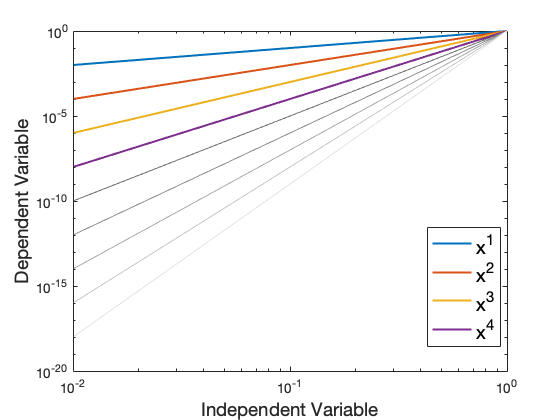

In [30]:
%plot inline
run lameplot2.m

#### 5. The Kolmogorov length scale:

```matlab
a = [ 0.035 0.0001;

      0.020 0.0002;

      0.015 0.0010;

      0.030 0.0007;

      0.022 0.0003 ];

nu=a(:,1); epsilon=a(:,2);
```

In [11]:
a = [ .035 .0001; .020 .0002; .015 .0010; .030 .0007; .022 .0003 ];
    nu = a(:,1); epsilon = a(:,2);

In [10]:
l = [(nu.^3)./(epsilon)].^(1/4)

l =
         0.809190980353488
         0.447213595499958
         0.241028525683396
         0.443165997355836
         0.434046938115094


#### 6. Mean Value Theorem (Integration)
#### (a) `my_mean`

**Save to working directory as** `my_mean.m`
```matlab
function y = my_mean(fun,a,b,N)
h = (b-a)/N; ue = 0; oe = 0;
    for j = 1:N;
        x = a + (j-1)*h;
        F = 1/N*fun(x);
        ue = ue + F;
    end
    for j = 1:N;
        x = a + (j)*h;
        F = 1/N*fun(x);
        oe = oe + F;
    end
    y = mean([ue,oe]);
    %fprintf('\n%f ~ my_mean ~ %f\n',[ue,oe])
end
```

#### (b) `my_fun`

**Save to working directory as** `my_fun.m`
```matlab
function y = my_fun(x)
    y = x.*exp(x);
end
```

#### (c) Use my mean and my fun to compute an approximation to (see handwritten attachment):

$$\mathcal{MV} = \frac{1}{2}\int_{-1}^{1} x e^x dx$$

In [22]:
N = 10*2.^[0:7];
mymean = [];

In [23]:
for i = N
   mymean = [mymean,my_mean(@my_fun,-1,1,i)];
end

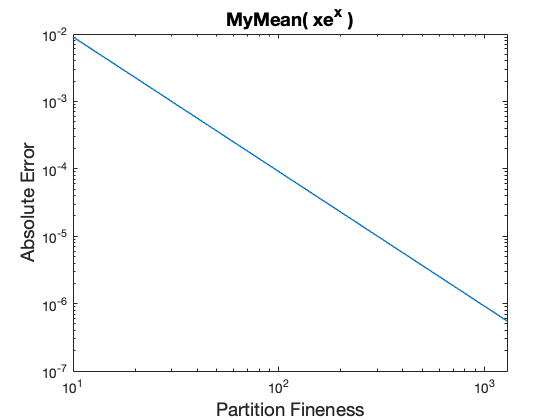

In [24]:
%plot inline
err = abs(mymean-1/exp(1));
loglog(N,err,'LineWidth',1)
title('MyMean( xe^x )','FontSize',14)
xlabel('Partition Fineness','FontSize',14)
ylabel('Absolute Error','FontSize',14)

#### (d) Absolute error vs. N table

In [25]:
disp(array2table([N;mymean;err]','VariableNames',{'N','Estimate','Error'}))

     N          Estimate                Error        
    ____    _________________    ____________________
      10    0.376929132538058     0.00904969136661565
      20    0.370143972289832     0.00226453111839003
      40    0.368445705890543    0.000566264719100762
      80    0.368021015600131    0.000141574428688451
     160    0.367914835294214    3.53941227713706e-05
     320    0.367888289734361    8.84856291888392e-06
     640    0.367881653314186     2.2121427438182e-06
    1280    0.367879994207254    5.53035812034253e-07
